In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("pollution_data.csv")

In [3]:
df.head()

,temp_avr,temp_max,temp_min,pres,u,v,prec,datetime,Budateteny,Csepel,Erzsebet,Gergely,Gilice,Honved,Kaposztas,Korakas,Kosztolanyi,Pesthidegkut,Szena,Teleki
0,-3.185714,-1.9,-4.6,1020.360691,0.963806,1.041120,0.0,2011-01-01,83.0,58.0,75.0,55.0,73.0,65.0,62.0,76.0,68.0,61.0,78.0,69.0
1,-1.212500,2.7,-4.7,1017.916448,1.500336,-0.015490,0.0,2011-01-02,37.0,29.0,35.0,24.0,36.0,28.0,21.0,35.0,32.0,25.0,33.0,35.0
2,-4.512500,-1.9,-7.7,1022.382748,-0.426777,-0.461940,0.0,2011-01-03,46.0,34.0,47.0,26.0,39.0,44.0,35.0,47.0,42.0,31.0,46.0,45.0
3,-4.462500,-3.5,-5.5,1025.815799,-0.128941,1.072592,0.0,2011-01-04,38.0,28.0,44.0,22.0,27.0,38.0,34.0,43.0,40.0,42.0,46.0,42.0
4,-4.800000,-4.3,-5.5,1025.599150,-1.841358,1.456059,0.0,2011-01-05,37.0,29.0,40.0,23.0,33.0,33.0,31.0,37.0,34.0,37.0,43.0,37.0


In [4]:
df.columns

Index(['temp_avr', 'temp_max', 'temp_min', 'pres', 'u', 'v', 'prec',
       'datetime', 'Budateteny', 'Csepel', 'Erzsebet', 'Gergely', 'Gilice',
       'Honved', 'Kaposztas', 'Korakas', 'Kosztolanyi', 'Pesthidegkut',
       'Szena', 'Teleki'],
      dtype='object')

In [5]:
df1=df.drop(['Csepel', 'Erzsebet', 'Gergely', 'Gilice',
       'Honved', 'Kaposztas', 'Korakas', 'Kosztolanyi', 'Pesthidegkut',
       'Szena', 'Teleki'],axis=1)

In [6]:
df1

,temp_avr,temp_max,temp_min,pres,u,v,prec,datetime,Budateteny
0,-3.185714,-1.9,-4.6,1020.360691,0.963806,1.041120,0.0,2011-01-01,83.0
1,-1.212500,2.7,-4.7,1017.916448,1.500336,-0.015490,0.0,2011-01-02,37.0
2,-4.512500,-1.9,-7.7,1022.382748,-0.426777,-0.461940,0.0,2011-01-03,46.0
3,-4.462500,-3.5,-5.5,1025.815799,-0.128941,1.072592,0.0,2011-01-04,38.0
4,-4.800000,-4.3,-5.5,1025.599150,-1.841358,1.456059,0.0,2011-01-05,37.0
...,...,...,...,...,...,...,...,...,...
2913,7.483333,10.3,5.7,1019.844067,3.914364,-0.015945,0.0,2018-12-23,15.0
2914,4.479167,7.3,1.4,1014.172311,2.560526,-1.852389,7.0,2018-12-24,11.0
2915,2.175000,3.8,0.7,1027.126803,3.471999,-3.291600,0.0,2018-12-25,7.0
2916,4.150000,5.6,3.2,1026.771276,4.470633,-1.955350,0.0,2018-12-26,11.0


In [7]:
df1.isnull().sum()

temp_avr      0
temp_max      0
temp_min      0
pres          0
u             0
v             0
prec          0
datetime      0
Budateteny    0
dtype: int64

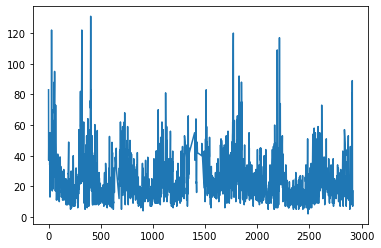

In [8]:
plt.plot(df1['Budateteny'])

In [9]:
df2=df1['Budateteny']

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [11]:
df2[:2]

array([[0.62790698],
       [0.27131783]])

Lets split the data into training data and test data

Lets consider first 65 percent of the data as training samples

Remaining 35 percent of the data as test samples


In [12]:
train_size=int(len(df2)*0.65)
test_size=len(df2)-train_size
print("train size :" + str(train_size))
print("test size :" + str(test_size))

train size :1896
test size :1022


In [13]:
train_data=df2[0:train_size]
train_data.shape

(1896, 1)

In [14]:
test_data=df2[train_size:len(df2)]
test_data.shape

(1022, 1)

Lets create training and test datasets from time series data

In [15]:
## Function to create training and test data from time series data given the time_stamp size
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1795, 100)
(1795,)


(None, None)

In [18]:
print(X_test.shape), print(y_test.shape)

(921, 100)
(921,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape),print(X_test.shape)

(1795, 100, 1)
(921, 100, 1)


(None, None)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(15,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 15)           1020      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 15)           1860      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 10)           1040      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 4,771
Trainable params: 4,771
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
90/90 [==============================] - 7s 78ms/step - loss: 0.0157 - val_loss: 0.0106
Epoch 2/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0125 - val_loss: 0.0100
Epoch 3/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0121 - val_loss: 0.0099
Epoch 4/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0120 - val_loss: 0.0099
Epoch 5/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 6/100
90/90 [==============================] - 6s 67ms/step - loss: 0.0114 - val_loss: 0.0099
Epoch 7/100
90/90 [==============================] - 6s 67ms/step - loss: 0.0112 - val_loss: 0.0100
Epoch 8/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0110 - val_loss: 0.0097
Epoch 9/100
90/90 [==============================] - 6s 68ms/step - loss: 0.0106 - val_loss: 0.0103
Epoch 10/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0101 - val_loss: 0.0095

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.598436704651792

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

24.933199547864433

In [28]:
X_test.shape

(921, 100, 1)

In [29]:
model.predict(X_test)

array([[0.10086504],
       [0.14594023],
       [0.14994858],
       [0.12937585],
       [0.12669402],
       [0.14343746],
       [0.24415417],
       [0.24049501],
       [0.16288969],
       [0.21286304],
       [0.09250117],
       [0.17205691],
       [0.16986492],
       [0.18013851],
       [0.21045876],
       [0.13670416],
       [0.10581495],
       [0.15248726],
       [0.12164458],
       [0.11209995],
       [0.15534016],
       [0.1318582 ],
       [0.1381228 ],
       [0.17388643],
       [0.2050053 ],
       [0.16041476],
       [0.09097126],
       [0.11244627],
       [0.11293984],
       [0.10506621],
       [0.13138922],
       [0.11322971],
       [0.13797525],
       [0.14051321],
       [0.25139207],
       [0.20966423],
       [0.22496155],
       [0.2458176 ],
       [0.21391644],
       [0.21383178],
       [0.28481424],
       [0.11747001],
       [0.23082736],
       [0.18451135],
       [0.14392897],
       [0.12737158],
       [0.13184461],
       [0.173

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [31]:
trainPredictPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [32]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
testPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [13.99157906],
       [11.92360783],
       [        nan]])

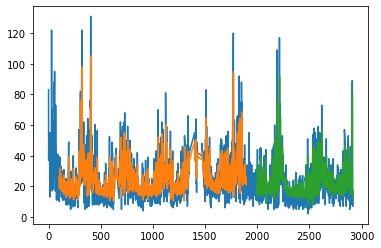

In [33]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

1022

In [35]:
test_data[1021]

array([0.11627907])

In [36]:
1022-100

922

In [37]:
x_input=test_data[922:].reshape(1,-1)
x_input.shape
x_input

array([[0.23255814, 0.27131783, 0.31782946, 0.17054264, 0.07751938,
        0.05426357, 0.03875969, 0.08527132, 0.17054264, 0.26356589,
        0.12403101, 0.08527132, 0.24031008, 0.11627907, 0.10077519,
        0.10852713, 0.17829457, 0.25581395, 0.42635659, 0.41437632,
        0.40239605, 0.39041579, 0.37843552, 0.36645525, 0.35447498,
        0.34249471, 0.33051445, 0.31853418, 0.30655391, 0.29457364,
        0.3255814 , 0.25581395, 0.09302326, 0.10852713, 0.10077519,
        0.03875969, 0.0620155 , 0.09302326, 0.19379845, 0.11627907,
        0.10852713, 0.10077519, 0.07751938, 0.21705426, 0.26356589,
        0.2248062 , 0.1627907 , 0.17829457, 0.20930233, 0.18604651,
        0.26356589, 0.33333333, 0.27131783, 0.30232558, 0.36434109,
        0.39534884, 0.10852713, 0.12403101, 0.06976744, 0.07751938,
        0.18604651, 0.14728682, 0.09302326, 0.11627907, 0.13178295,
        0.13178295, 0.15503876, 0.1627907 , 0.02325581, 0.02325581,
        0.09302326, 0.15503876, 0.14728682, 0.23

In [38]:
# Prediction: Pollution value next day

x_input=x_input.reshape(1,-1)

x_input = x_input.reshape((1, time_step , 1))

prediction = model.predict(x_input)

print("Pollution level for the next day in Budateteny:" + str(int(scaler.inverse_transform(prediction)[0])))

Pollution level for the next day in Budateteny:18


In [39]:
data=pd.DataFrame(scaler.inverse_transform(df2))

In [40]:
data.describe()

,0
count,2918.000000
mean,26.104695
std,15.450426
min,2.000000
25%,15.000000
50%,22.000000
75%,34.000000
max,131.000000
